# Multiclass Classification

**Problem Statement:** Given a dataset that contains images of clothing items, build an image classification model that can classify the clothing items containing 10 categories.

Fashion MNIST dataset is used here.

## Import Tensorflow 2.0

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass  

TensorFlow 2.x selected.


## Import Necessary Libraries

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import classification_report
%matplotlib inline

## Loading & Preprocess the dataset

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

## Build the model

We'll use Tensorflow keras high level API

**Neural Network Architecture**

* Batch Normalization - Input Layer
* Convolution 2D layer
* Max Pooling 2D layer
* Dropout layer
* Batch Normalization - Input Layer
* Convolution 2D layer
* Max Pooling 2D layer
* Dropout layer
* Batch Normalization - Input Layer
* Convolution 2D layer
* Max Pooling 2D layer
* Dropout layer
* Flatten layer
* Dense layer 
* Activation layer
* Dropout layer
* Output layer - Dense layer for 10 classes
* Activation layer

Find out why the above model is conveptually wrong / won't give good results.


In [0]:
def init_CNN_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  # model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  # model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  # model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

## Use Distributed strategy for training

In [18]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [19]:
print(f'Number of devices: {strategy.num_replicas_in_sync}')

Number of devices: 1


In [0]:
with strategy.scope():
  model = init_CNN_model()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [21]:
h = model.fit(x_train, y_train, epochs=17, steps_per_epoch=60, validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/17
60000/60000 [==============================] - 10s 173us/sample - loss: 1.2111 - accuracy: 0.6648 - val_loss: 0.8759 - val_accuracy: 0.6606
Epoch 2/17
60000/60000 [==============================] - 7s 113us/sample - loss: 0.5453 - accuracy: 0.8122 - val_loss: 1.1812 - val_accuracy: 0.5709
Epoch 3/17
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4472 - accuracy: 0.8462 - val_loss: 0.9333 - val_accuracy: 0.6752
Epoch 4/17
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3870 - accuracy: 0.8651 - val_loss: 1.0320 - val_accuracy: 0.6322
Epoch 5/17
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3430 - accuracy: 0.8793 - val_loss: 0.7177 - val_accuracy: 0.7365
Epoch 6/17
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3157 - accuracy: 0.8874 - val_loss: 0.3776 - val_accuracy: 0.8584
Epoch 7/17
60000/60000 [=========================

## Save the model weights

In [0]:
model.save_weights('./fashion_new.h5')

## Evaluate

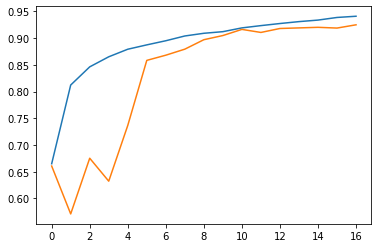

In [23]:
f = pyplot.figure(2) 
pyplot.plot(h.history['accuracy'])
pyplot.plot(h.history['val_accuracy'])

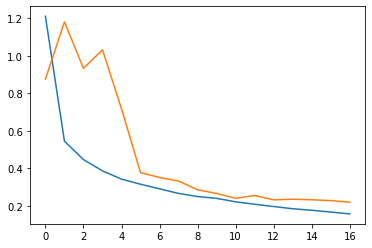

In [24]:
g = pyplot.figure(3)
pyplot.plot(h.history['loss'])
pyplot.plot(h.history['val_loss'])

In [0]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [0]:
def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)
  pyplot.gcf().set_size_inches(8, 8)  

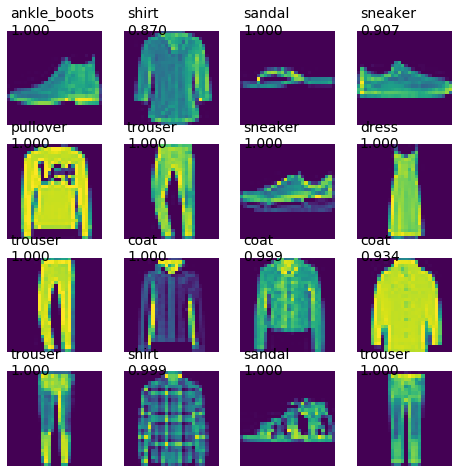

In [27]:
plot_predictions(np.squeeze(x_test[:16]), model.predict(x_test[:16]))